## EDA Plan:
1. Follow the same sequence of steps as in analysis of products: **segment districts** by some descriptive statistic of engagement index
2. Once we have segmented districts, we can **explore characteristics of those districts** that may have contributed. For example: what is the typical demographic of a district with high engagement?
3. Finally, we can explore the **interplay between districts and products**: which products do high, medium and low engagement districts use 

In [15]:
# Importing libraries
import os
import pandas as pd
import pyarrow.parquet as pq
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Setting the working directory
path = os.getcwd()
parent_dir = os.path.dirname(path)
data_dir = os.path.join(parent_dir, 'data')
print(data_dir)

/Users/eshan23/eshanprashar_git_profile/kaggle_practice/L1_education/covid_edtech_usage/data


In [72]:
# Defining file pathnames
districts_path = 'districts_info.csv'
engagement_path = 'engagement_data_filtered.parquet'
engagement_idx_path = 'engagement_idx_by_product_info.parquet'

# Reading the data
districts_info = pd.read_csv(os.path.join(data_dir, districts_path))
engagement_filtered = pq.read_table(os.path.join(data_dir, engagement_path)).to_pandas()
engagement_idx_by_product_info = pq.read_table(os.path.join(data_dir, engagement_idx_path)).to_pandas()

In [73]:
# Examining the data
districts_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [74]:
# Examining the data
engagement_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11691587 entries, 0 to 22324188
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             int64  
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 535.2+ MB


In [75]:
# Examining the data
engagement_idx_by_product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lp_id               369 non-null    int64  
 1   engagement_index    369 non-null    float64
 2   engagement_level    369 non-null    object 
 3   product_name        369 non-null    object 
 4   primary_function    350 non-null    object 
 5   secondary_function  350 non-null    object 
 6   tertiary_function   350 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 20.3+ KB


In [76]:
# First, we analyse the districts_info dataset
# Remove districts which cannot be mapped to states
districts_info = districts_info.dropna(subset=['state'])

# Examine count of districts per state
print('Total districts:', districts_info.shape[0])
districts_info['state'].value_counts()

Total districts: 176


state
Connecticut             30
Utah                    29
Massachusetts           21
Illinois                18
California              12
Ohio                    11
New York                 8
Indiana                  7
Washington               6
Missouri                 6
Virginia                 4
North Carolina           4
Wisconsin                3
District Of Columbia     3
New Jersey               2
Texas                    2
Tennessee                2
New Hampshire            2
Michigan                 2
Minnesota                1
Arizona                  1
Florida                  1
North Dakota             1
Name: count, dtype: int64

In [77]:
# Function to extract the lower bound of the range and convert to a float
# Handles NaN values and returns None

def extract_upper_bound(range_str):
    if pd.isna(range_str):
        return -1
    match = re.search(r'\[(-?\d+(\.\d+)?),\s*(-?\d+(\.\d+)?)\[', range_str)
    if match:
        return float(match.group(3))  # Group 3 contains the upper bound
    return -1

# Define a new dataframe called districts_info_modified
districts_info_modified = districts_info.copy()

# Apply the function to extract and convert the range strings
districts_info_modified['pct_black/hispanic_modified'] = districts_info['pct_black/hispanic'].apply(extract_lower_bound)
districts_info_modified['pct_free/reduced_modified'] = districts_info['pct_free/reduced'].apply(extract_lower_bound)
districts_info_modified['county_connections_ratio_modified'] = districts_info['county_connections_ratio'].apply(extract_lower_bound)
districts_info_modified['pp_total_raw_modified'] = districts_info['pp_total_raw'].apply(extract_lower_bound)

# Examine the data types
districts_info_modified

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,pct_black/hispanic_modified,pct_free/reduced_modified,county_connections_ratio_modified,pp_total_raw_modified
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",0.0,0.0,0.18,14000.0
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000[",0.0,0.2,0.18,6000.0
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000[",0.0,0.0,0.18,10000.0
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",0.0,0.4,0.18,6000.0
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000[",0.2,0.2,0.18,8000.0
...,...,...,...,...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000[",0.0,0.4,0.18,18000.0
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000[",0.2,-1.0,0.18,8000.0
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000[",0.0,0.4,0.18,12000.0
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN,0.6,0.6,0.18,-1.0


In [80]:
# Drop the original columns if they exist
columns_to_drop = ['pct_black/hispanic', 'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw']
districts_info_modified = districts_info_modified.drop(columns=columns_to_drop, errors='ignore')
districts_info_modified

,district_id,state,locale,pct_black/hispanic_modified,pct_free/reduced_modified,county_connections_ratio_modified,pp_total_raw_modified
0,8815,Illinois,Suburb,0.0,0.0,0.18,14000.0
2,4921,Utah,Suburb,0.0,0.2,0.18,6000.0
5,5987,Wisconsin,Suburb,0.0,0.0,0.18,10000.0
6,3710,Utah,Suburb,0.0,0.4,0.18,6000.0
7,7177,North Carolina,Suburb,0.2,0.2,0.18,8000.0
...,...,...,...,...,...,...,...
228,9515,New York,Rural,0.0,0.4,0.18,18000.0
229,8103,Tennessee,Rural,0.2,-1.0,0.18,8000.0
230,4929,Virginia,Rural,0.0,0.4,0.18,12000.0
231,7975,California,City,0.6,0.6,0.18,-1.0


In [82]:
# Create a new dataframe called districts_info_binned
districts_info_binned = districts_info_modified.copy()

# Now we can bin these numeric values to make them more interpretable
bins_pct = [-1.1, -0.0001, 0.19, 0.39, 0.59, 0.79, 0.99] 
labels_pct = ['Missing', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

# Added the binned columns to the dataset
districts_info_binned['pct_black_hispanic_binned'] = pd.cut(districts_info_modified['pct_black/hispanic_modified'], bins=bins_pct, labels=labels_pct, include_lowest=True)
districts_info_binned['pct_free_reduced_binned'] = pd.cut(districts_info_modified['pct_free/reduced_modified'], bins=bins_pct, labels=labels_pct, include_lowest=True)

# Bins for county connections ratio
bins_connections = [-1, 0.17, 0.9, 1.9]
labels_connections = ['Missing','0.18-1.00', '1.00-2.00']

# Adding binned columns for connections
districts_info_binned['county_connections_ratio_binned'] = pd.cut(districts_info_modified['county_connections_ratio_modified'], bins=bins_connections, labels=labels_connections, include_lowest=True)

# Bins for per-pupil total expenditure
bins_pp = [-1, 0, 7500, 9500, 11500, 13500, 15500, 17500, float('inf')]
labels_pp = ['Missing', '< $8,000', '$8,000 - $10,000', '$10,000 - $12,000', '$12,000 - $14,000', '$14,000 - $16,000', '$16,000 - $18,000', '> $18,000']


# Adding binned columns to the dataset
districts_info_binned['pp_total_raw_binned'] = pd.cut(districts_info_modified['pp_total_raw_modified'], bins=bins_pp, labels=labels_pp, include_lowest=True)

# Examine the data
districts_info_binned

,district_id,state,locale,pct_black/hispanic_modified,pct_free/reduced_modified,county_connections_ratio_modified,pp_total_raw_modified,pct_black_hispanic_binned,pct_free_reduced_binned,county_connections_ratio_binned,pp_total_raw_binned
0,8815,Illinois,Suburb,0.0,0.0,0.18,14000.0,0-20%,0-20%,0.18-1.00,"$14,000 - $16,000"
2,4921,Utah,Suburb,0.0,0.2,0.18,6000.0,0-20%,20-40%,0.18-1.00,"< $8,000"
5,5987,Wisconsin,Suburb,0.0,0.0,0.18,10000.0,0-20%,0-20%,0.18-1.00,"$10,000 - $12,000"
6,3710,Utah,Suburb,0.0,0.4,0.18,6000.0,0-20%,40-60%,0.18-1.00,"< $8,000"
7,7177,North Carolina,Suburb,0.2,0.2,0.18,8000.0,20-40%,20-40%,0.18-1.00,"$8,000 - $10,000"
...,...,...,...,...,...,...,...,...,...,...,...
228,9515,New York,Rural,0.0,0.4,0.18,18000.0,0-20%,40-60%,0.18-1.00,"> $18,000"
229,8103,Tennessee,Rural,0.2,-1.0,0.18,8000.0,20-40%,Missing,0.18-1.00,"$8,000 - $10,000"
230,4929,Virginia,Rural,0.0,0.4,0.18,12000.0,0-20%,40-60%,0.18-1.00,"$12,000 - $14,000"
231,7975,California,City,0.6,0.6,0.18,-1.0,60-80%,60-80%,0.18-1.00,Missing


In [83]:
# Drop the modified columns
columns_to_drop = ['pct_black/hispanic_modified', 'pct_free/reduced_modified', 'county_connections_ratio_modified', 'pp_total_raw_modified']
districts_info_binned = districts_info_binned.drop(columns=columns_to_drop, errors='ignore')
districts_info_binned

,district_id,state,locale,pct_black_hispanic_binned,pct_free_reduced_binned,county_connections_ratio_binned,pp_total_raw_binned
0,8815,Illinois,Suburb,0-20%,0-20%,0.18-1.00,"$14,000 - $16,000"
2,4921,Utah,Suburb,0-20%,20-40%,0.18-1.00,"< $8,000"
5,5987,Wisconsin,Suburb,0-20%,0-20%,0.18-1.00,"$10,000 - $12,000"
6,3710,Utah,Suburb,0-20%,40-60%,0.18-1.00,"< $8,000"
7,7177,North Carolina,Suburb,20-40%,20-40%,0.18-1.00,"$8,000 - $10,000"
...,...,...,...,...,...,...,...
228,9515,New York,Rural,0-20%,40-60%,0.18-1.00,"> $18,000"
229,8103,Tennessee,Rural,20-40%,Missing,0.18-1.00,"$8,000 - $10,000"
230,4929,Virginia,Rural,0-20%,40-60%,0.18-1.00,"$12,000 - $14,000"
231,7975,California,City,60-80%,60-80%,0.18-1.00,Missing


In [84]:
# Distribution of labels across states: we will plot states on the x-axis and the count of districts in each state on the y-axis
# count of the color will be determined by value of the label
# we will define a function to do this one by one for each of the variables: pct_black_hispanic_binned, pct_free_reduced_binned, county_connections_ratio_binned, pp_total_raw_binned

def plot_distribution(df, label):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='state', hue=label)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {label} across states')
    plt.show()

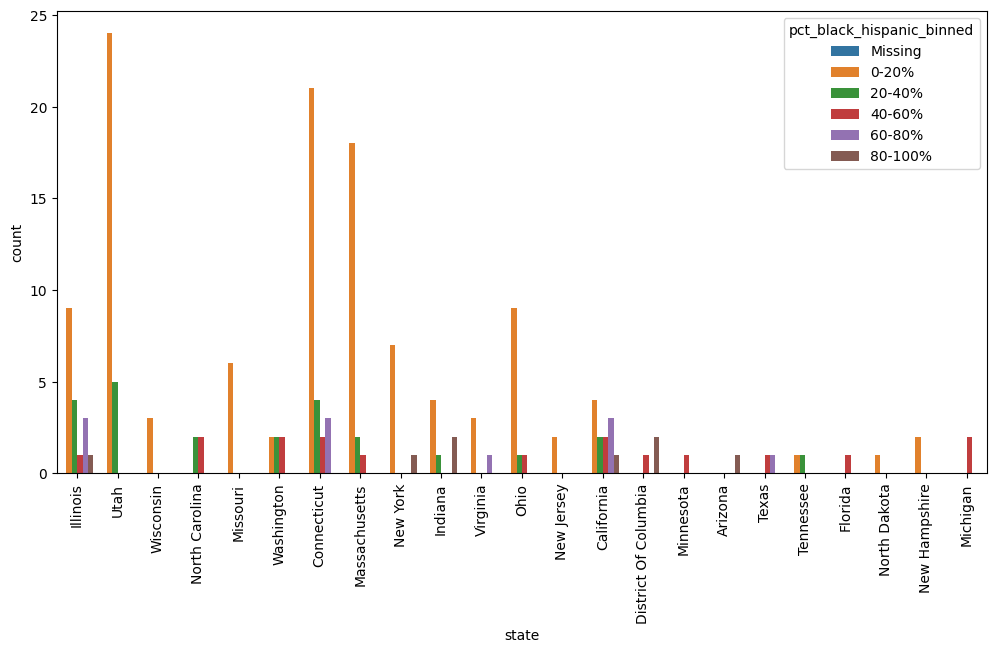

In [85]:
# Plot the distribution of districts across states based on the binned percentage of black and hispanic students
# Sort states by count of total districts
df = districts_info_binned
label = 'pct_black_hispanic_binned'
plot_distribution(df, label)

**Key Takeaways on race distribution across districts:**
1. Overall, a majority of districts have 0-20% black/hispanic students. Any analysis at the state level would not be representative, so we will have to create smaller segments for comparisons to make sense
2. Illinois, Connecticut and California seem to have 3 districts with 60-80% black/hispanic students. It would be interesting to compare the per-pupil expenditure and engagement indices of these districts across states 
3. Similarly, it would be interesting to analyze green districts (20-40% black/hispanic students) across IL (D), UT (R) and Connecticut (R)

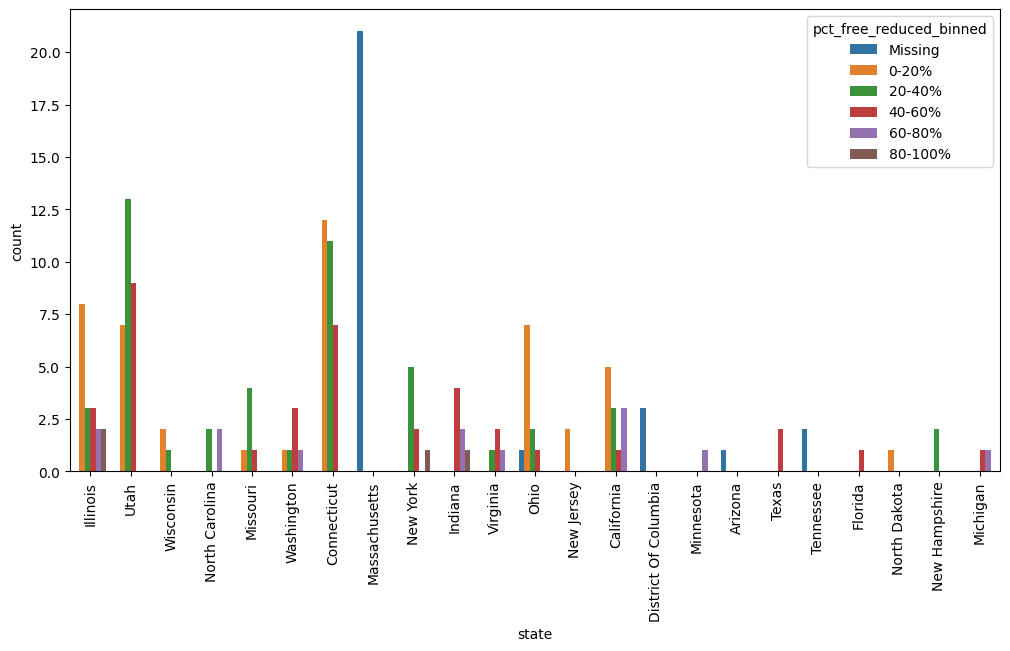

In [86]:
# Now creating the same plot for the binned percentage of free and reduced lunch
label = 'pct_free_reduced_binned'
plot_distribution(df, label)

**Key Takeaways:**  
In this plot, Utah and Connecticut would provide interesting comparisons - both are white majority Republican states, but it seems that on average, Utah has a higher proportion of districts using the _free or reduced fee lunch_ program

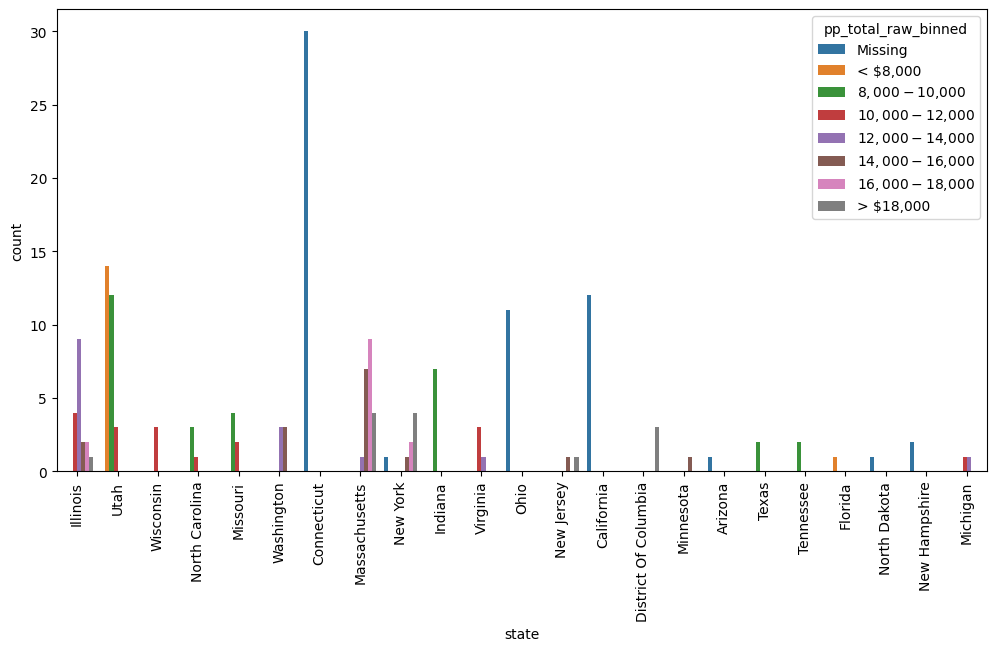

In [88]:
# The country connections ratio doesn't seem to be very informative because most of the districts have a ratio of 0.18-1.00
# Let's plot the distribution of districts across states based on the binned per-pupil total expenditure
label = 'pp_total_raw_binned'
plot_distribution(df, label)

**Key Takeaways:**
While it is difficult to make cross-state comparisons, we can potentially make comparisons of districts within states:
- IL, which has ~10 districts in the bucket $12-14K with 4 districts below and 4 states above that level of spending
- UT, which has ~15 districts in the <$8K bucket and 12 in the $8-10K bucket
- MA, which as ~10 districts in the $16-18K bucket and 7 in the bucket $14-16K 

This could be the first level of analysis. We could add another layer by checking if districts that have this data also have data on race and lunch programs.

### Next Steps:
1. Aggregate engagement index by district and product function
2. Merge that with district dataset to explore engagement patterns across states district categories as explored above